# Análise de Dados com Python - Prática

In [2]:
# Importando as libs
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

In [3]:
# Lendo o conjunto de dados
dados = pd.read_csv('Arquivo-Treino.csv')

In [4]:
# Exibindo uma prévia dos dados
dados.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
# Resumo dos Campos Numéricos 
dados.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
print(dados.shape)

(614, 13)


In [8]:
dados.shape

(614, 13)

In [9]:
# Verificando a localização das propriedades
dados['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [10]:
dados['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [11]:
dados['Gender'].value_counts()
# Male = Masculino 3 Female = Feminino

Male      489
Female    112
Name: Gender, dtype: int64

In [12]:
dados['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [13]:
dados['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

## Analisando a Distribuição das Infos

<AxesSubplot:>

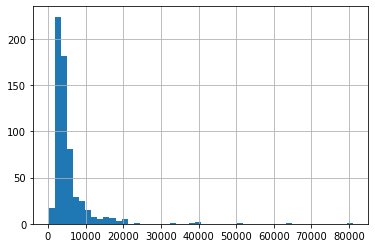

In [14]:
dados['ApplicantIncome'].hist(bins=50)

<AxesSubplot:>

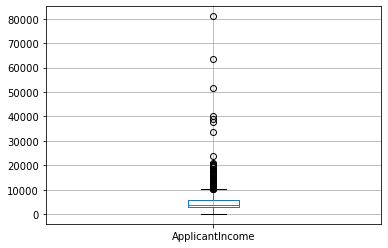

In [15]:
dados.boxplot(column='ApplicantIncome')

Text(0.5, 1.0, '\n')

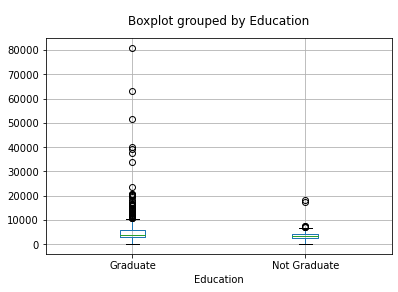

In [16]:
# Separando a Renda, baseado na Educação
dados.boxplot(column='ApplicantIncome', by = 'Education')
plt.title("\n")

<AxesSubplot:>

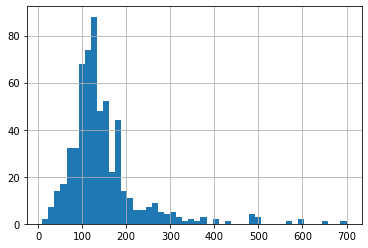

In [17]:
dados['LoanAmount'].hist(bins=50)

<AxesSubplot:>

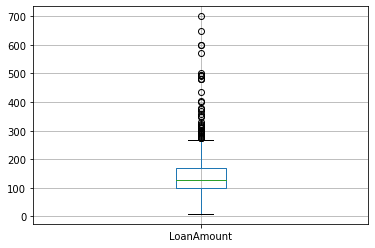

In [18]:
dados.boxplot(column='LoanAmount')

## Analise de Variáveis Categóricas(Pg 87)

- Primeira coisa que faremos, verificar as pessoas e fazer a contagem daqueles que tem credit history cadastrados.

In [21]:
# 0 = sem histórico de cred. 
# 1 = com histórico de cre.

temp1 = dados['Credit_History'].value_counts(ascending=True)
print(temp1)

0.0     89
1.0    475
Name: Credit_History, dtype: int64


In [56]:
# Verificando a possibilidade de conseguir/Ter Aprovado o empréstimo 
temp2 = dados.pivot_table(values = 'Loan_Status', index = ['Credit_History'], aggfunc=lambda x: x.map({'Y':1, 'N': 0}).mean())

print('Probabilidade de obter o empréstimo: ')

temp2

# P/ Lambda o que for igual a "yes"="Y"="sim"=1 e 0="N"="NO="NÃO" ele faz uma média entre estes valores 

Probabilidade de obter o empréstimo: 


,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


Text(0.5, 1.0, 'Probalidade de Conseguir o Empréstimo por Histórico de Crédito')

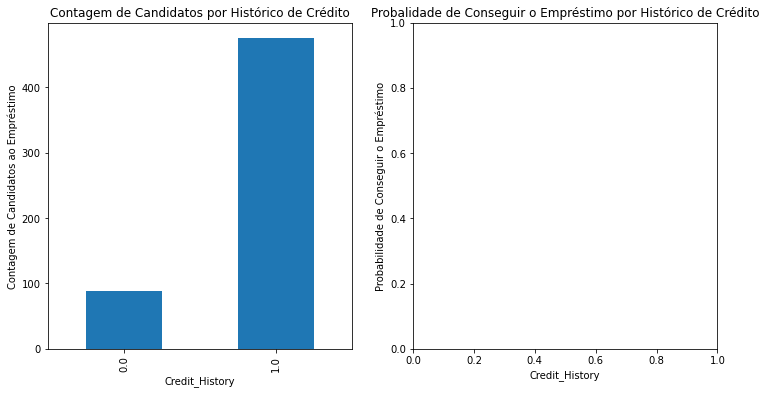

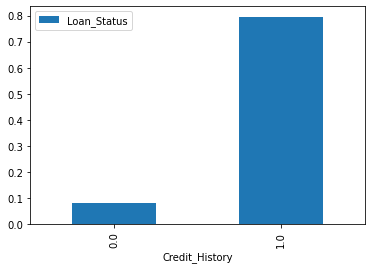

In [62]:
fig = plt.figure(figsize=(12,6)) # Alterando o tamanho do gráf.

# plot. o gráf.

ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Contagem de Candidatos ao Empréstimo')
ax1.set_title('Contagem de Candidatos por Histórico de Crédito')
temp1.plot(kind='bar') # Contagem das pessoas

ax2 = fig.add_subplot(122)
temp2.plot(kind='bar') # Probabilidade
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probabilidade de Conseguir o Empréstimo')
ax2.set_title('Probalidade de Conseguir o Empréstimo por Histórico de Crédito')



In [31]:
# criando graf.

temp3 = pd.crosstab(dados['Credit_History'], dados['Loan_Status'])

<AxesSubplot:xlabel='Credit_History'>

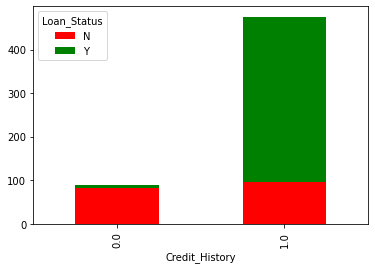

In [63]:
# Plotando o graf.

temp3.plot(kind='bar', stacked= True, color=['red', 'green'], grid=False)

<AxesSubplot:xlabel='Credit_History'>

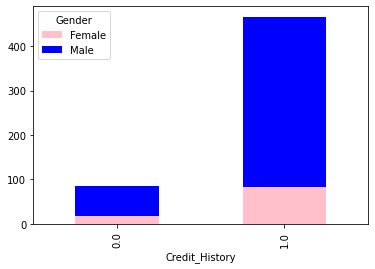

In [67]:
# Recuperando as info para montagem de outro graf.

temp4 = pd.crosstab(dados['Credit_History'], dados['Gender'])

# Plotando o graf.

temp4.plot(kind='bar', stacked= True, color=['pink', 'blue'], grid=False)

# Munging de dados com Python e Pandas 

1. Primeiro precisamos verificar os dados e suas respectivas informações faltantes. 

2. Verificar se o campo é nulo, para isso vamos utilizazar o camando isnull().

* isnull = True 'informação faltante'
* isnull = false 'a infirmação existe'

In [37]:
dados.apply(lambda x: sum(x.isnull()), axis=0) # Lembrando que eixo "Axis = 0" são as linhas e =1 são as colunas

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
# Loan Amount - Faço a média e substituo as informações faltantes pelo valor médio 

dados['LoanAmount'].fillna(dados['LoanAmount'].mean(),inplace=True) # fillna = para preencher / .mean = fazer a média / 
# inplace = Substituir as infos faltantes

dados['LoanAmount']

0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
          ...    
609     71.000000
610     40.000000
611    253.000000
612    187.000000
613    133.000000
Name: LoanAmount, Length: 614, dtype: float64

In [50]:
# Verificando os self_emplyed

dados['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [54]:
# Preenchedo o "NO" com os dados faltantes

dados['Self_Employed'].fillna('No', inplace=True)

dados.apply(lambda x: sum(x.isnull()),axis = 0) # Comparar com a alt 37

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64